In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [2]:
heart_disease= pd.read_csv('/Users/ds_learner51/Downloads/heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
heart_disease.shape

(1025, 14)

DATA CLEANING

1. CHECK NULL VALUES

In [5]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2. CHECK DUPLICATES

In [6]:
heart_disease.duplicated().sum()


723

3. REMOVING DUPLICATES

In [7]:
heart_disease.drop_duplicates(inplace= True)

4. CHECK IF THE DUPLICATES ARE REMOVED

In [8]:
heart_disease.duplicated().sum()


0

In [9]:
heart_disease.shape

(302, 14)

In [10]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Attribute Information:
1. age (age in years)
2. sex (1 = male; 0 = female)
3. cp (chest pain type (4 values))
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. thalach (maximum heart rate achieved)
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

DATA VISUALIZATION

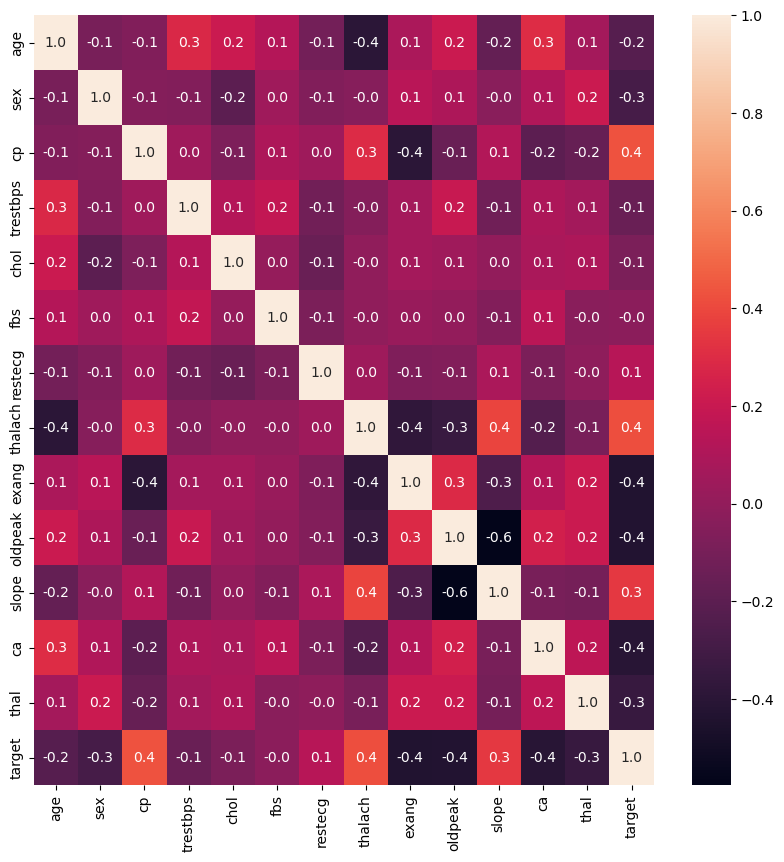

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_disease.corr(),annot=True,fmt='.1f')
plt.show()

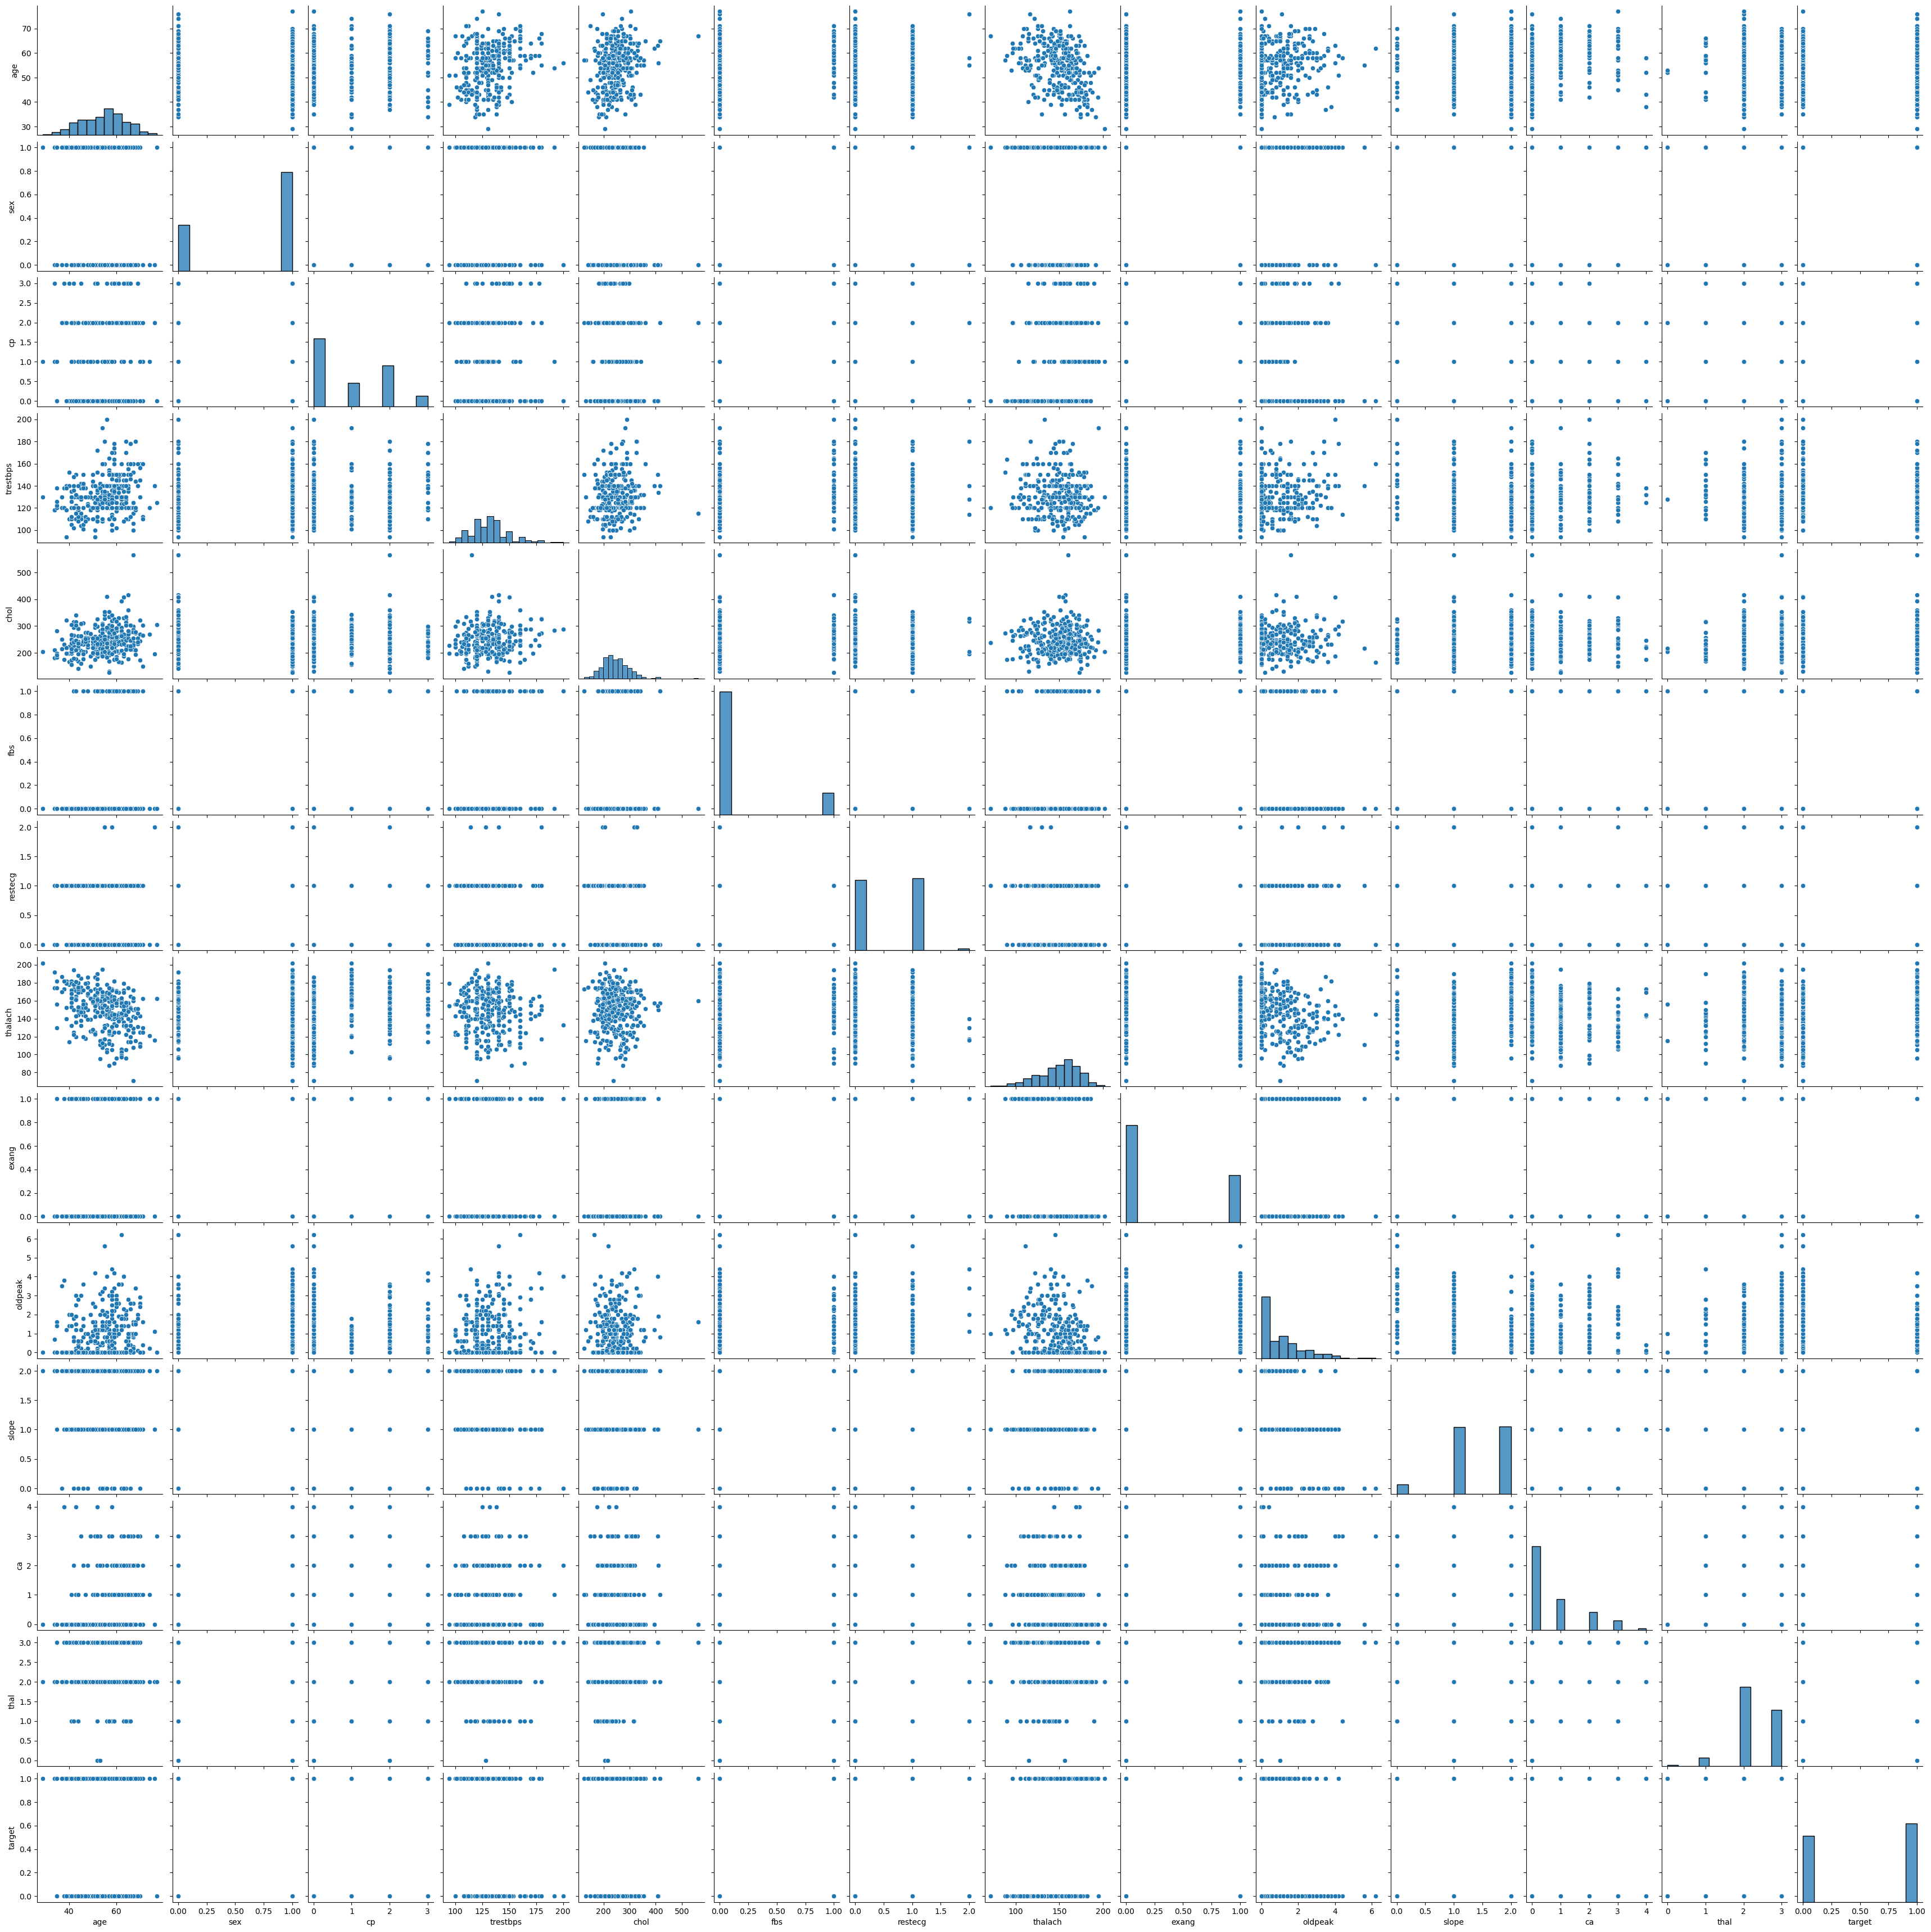

<Figure size 1000x500 with 0 Axes>

In [13]:
sns.pairplot(heart_disease)
plt.figure(figsize=(10,5))
plt.show()

CHANGE 0 TO 'MALE' AND 1 TO 'FEMALE'

In [14]:

def gender(sex):
    if sex==1:
        return 'Male'
    elif sex==0:
        return 'Female'

In [15]:
heart_disease['sex_']=heart_disease['sex'].apply(gender)
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


CHANGE 0 TO 'NO DISEASE' AND 1 TO 'DISEASE'

In [16]:
def diseases(target):
    if target==1:
        return 'Heart Disease'
    elif target==0:
        return 'No Heart disease'

RENAMING COLUMNS ACCORDINGLY

In [17]:
heart_disease['Heart Disease']=heart_disease['target'].apply(diseases)
heart_disease['Cholestrol']=heart_disease['chol']
heart_disease['Chest pains']=heart_disease['cp']
#heart_disease['thalassemia']=heart_disease['thal']
heart_disease['Resting blood pressure']=heart_disease['trestbps']
heart_disease['Resting electrocardiographic results']=heart_disease['restecg']
heart_disease['heart rate']=heart_disease['thalach']
heart_disease['Exercise induced angina']=heart_disease['exang']
heart_disease['major blood vessels']=heart_disease['ca']


heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,sex_,Heart Disease,Cholestrol,Chest pains,Resting blood pressure,Resting electrocardiographic results,heart rate,Exercise induced angina,major blood vessels
0,52,1,0,125,212,0,1,168,0,1.0,...,0,Male,No Heart disease,212,0,125,1,168,0,2
1,53,1,0,140,203,1,0,155,1,3.1,...,0,Male,No Heart disease,203,0,140,0,155,1,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,Male,No Heart disease,174,0,145,1,125,1,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,Male,No Heart disease,203,0,148,1,161,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,Female,No Heart disease,294,0,138,1,106,0,3


GROUPING AGES INTO 3 GROUPS

In [18]:
def age_range(age):
    if (age>=29) & (age<40) :
        return 'young ages'
    elif (age>=40) & (age<55):
        return 'middle ages'
    elif (age>55):
        return 'elderly ages'

In [19]:
heart_disease['age_range_']=heart_disease['age'].apply(age_range)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,sex_,Heart Disease,Cholestrol,Chest pains,Resting blood pressure,Resting electrocardiographic results,heart rate,Exercise induced angina,major blood vessels,age_range_
0,52,1,0,125,212,0,1,168,0,1.0,...,Male,No Heart disease,212,0,125,1,168,0,2,middle ages
1,53,1,0,140,203,1,0,155,1,3.1,...,Male,No Heart disease,203,0,140,0,155,1,0,middle ages
2,70,1,0,145,174,0,1,125,1,2.6,...,Male,No Heart disease,174,0,145,1,125,1,0,elderly ages
3,61,1,0,148,203,0,1,161,0,0.0,...,Male,No Heart disease,203,0,148,1,161,0,1,elderly ages
4,62,0,0,138,294,1,1,106,0,1.9,...,Female,No Heart disease,294,0,138,1,106,0,3,elderly ages


CHANGE 0 TO 'NO' AND 1 TO 'YES' 

In [20]:
def blood_sugar(fbs):
    if fbs==1:
        return 'True'
    elif fbs==0:
        return 'False'

heart_disease['fasting_blood_sugar']=heart_disease['fbs'].apply(blood_sugar)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Heart Disease,Cholestrol,Chest pains,Resting blood pressure,Resting electrocardiographic results,heart rate,Exercise induced angina,major blood vessels,age_range_,fasting_blood_sugar
0,52,1,0,125,212,0,1,168,0,1.0,...,No Heart disease,212,0,125,1,168,0,2,middle ages,False
1,53,1,0,140,203,1,0,155,1,3.1,...,No Heart disease,203,0,140,0,155,1,0,middle ages,True
2,70,1,0,145,174,0,1,125,1,2.6,...,No Heart disease,174,0,145,1,125,1,0,elderly ages,False
3,61,1,0,148,203,0,1,161,0,0.0,...,No Heart disease,203,0,148,1,161,0,1,elderly ages,False
4,62,0,0,138,294,1,1,106,0,1.9,...,No Heart disease,294,0,138,1,106,0,3,elderly ages,True


Change thal  column to thalassimia

In [21]:
def thalassemia(thal):
    if thal==0:
        return 'minor'
    elif thal == 1:
        return 'minima'
    elif thal == 2:
        return 'Haemoglobin disease'
    else :
        return 'Hydrops'
heart_disease['thalassimia']=heart_disease['thal'].apply(thalassemia)


DROPPING SEX, AGE, AND TARGET COLUMNS

In [22]:
# heart_disease['Heart Disease']=heart_disease['target'].apply(diseases)
# heart_disease['Cholestrol']=heart_disease['chol']
# heart_disease['Chest pains']=heart_disease['cp']
# #heart_disease['Fasting blood sugar']=heart_disease['fbs']
# heart_disease['Resting blood pressure']=heart_disease['trestbps']
# heart_disease['Resting electrocardiographic results']=heart_disease['restecg']
# heart_disease['heart rate']=heart_disease['thalach']
# heart_disease['Exercise induced angina']=heart_disease['exang']
# heart_disease['major blood vessels']=heart_disease['ca']

heart_disease.drop(['age', 'sex', 'target', 'fbs','cp','ca','exang','chol','restecg','trestbps','thal'], axis = 1, inplace = True)
heart_disease.head()

,thalach,oldpeak,slope,sex_,Heart Disease,Cholestrol,Chest pains,Resting blood pressure,Resting electrocardiographic results,heart rate,Exercise induced angina,major blood vessels,age_range_,fasting_blood_sugar,thalassimia
0,168,1.0,2,Male,No Heart disease,212,0,125,1,168,0,2,middle ages,False,Hydrops
1,155,3.1,0,Male,No Heart disease,203,0,140,0,155,1,0,middle ages,True,Hydrops
2,125,2.6,0,Male,No Heart disease,174,0,145,1,125,1,0,elderly ages,False,Hydrops
3,161,0.0,2,Male,No Heart disease,203,0,148,1,161,0,1,elderly ages,False,Hydrops
4,106,1.9,1,Female,No Heart disease,294,0,138,1,106,0,3,elderly ages,True,Haemoglobin disease


In [23]:
heart_disease['Heart Disease'].value_counts()

Heart Disease       164
No Heart disease    138
Name: Heart Disease, dtype: int64

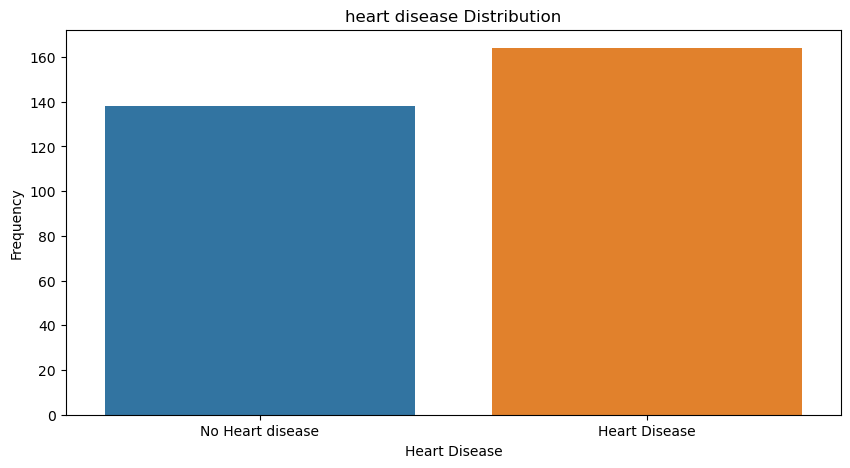

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Heart Disease', data=heart_disease)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.title('heart disease Distribution')
plt.show()

In [25]:
heart_disease.age_range_.value_counts()

elderly ages    151
middle ages     128
young ages       15
Name: age_range_, dtype: int64

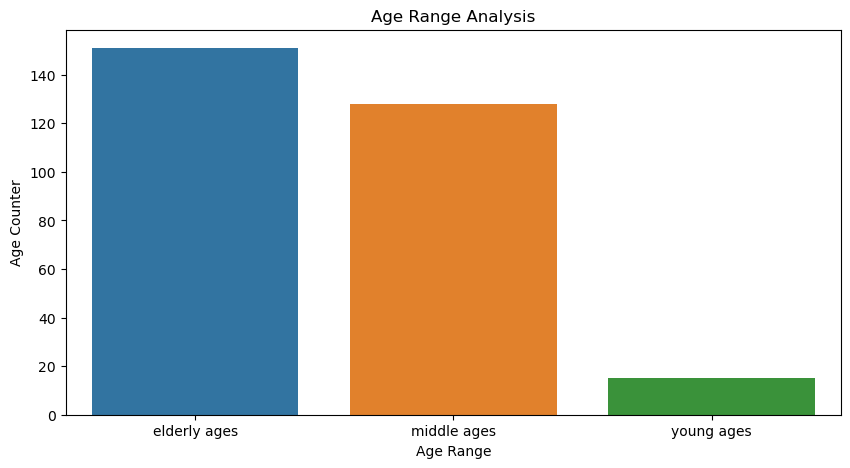

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=heart_disease.age_range_.value_counts()[:10].index,y=heart_disease.age_range_.value_counts()[:10].values)
plt.xlabel('Age Range')
plt.ylabel('Age Counter')
plt.title('Age Range Analysis')
plt.show()

In [27]:
heart_disease.sex_.value_counts()

Male      206
Female     96
Name: sex_, dtype: int64

/Users/ds_learner51/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


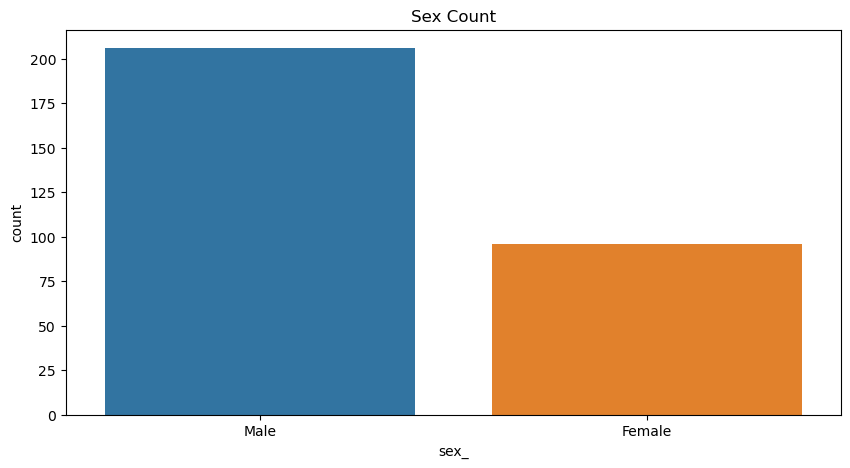

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(heart_disease.sex_)
plt.title('Sex Count')
plt.show()

/Users/ds_learner51/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


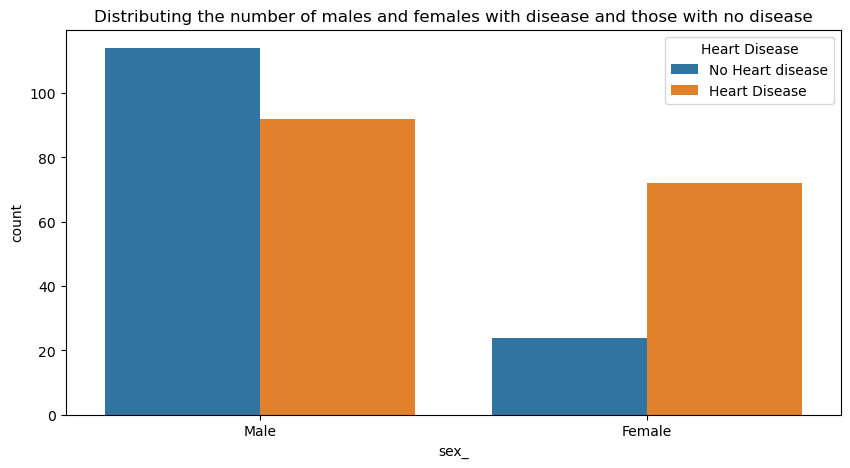

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(heart_disease.sex_,hue=heart_disease['Heart Disease'])
plt.title('Distributing the number of males and females with disease and those with no disease')
plt.show()

/Users/ds_learner51/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


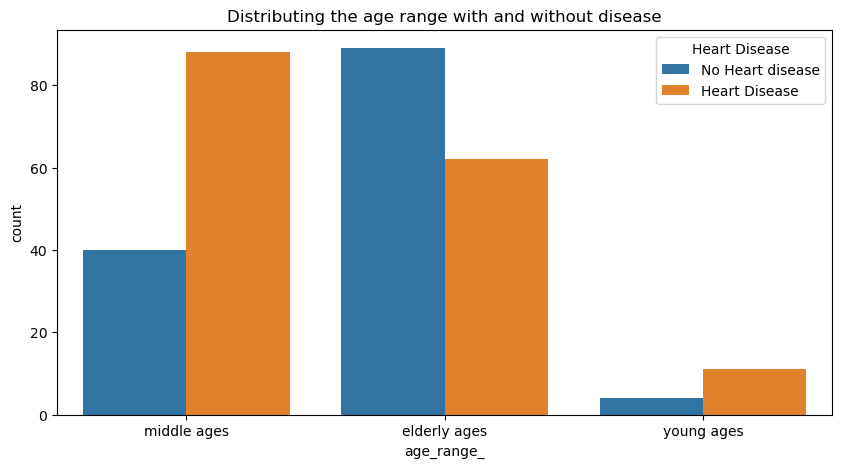

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(heart_disease.age_range_,hue=heart_disease['Heart Disease'])
plt.title('Distributing the age range with and without disease')
plt.show()

<Figure size 1000x500 with 0 Axes>

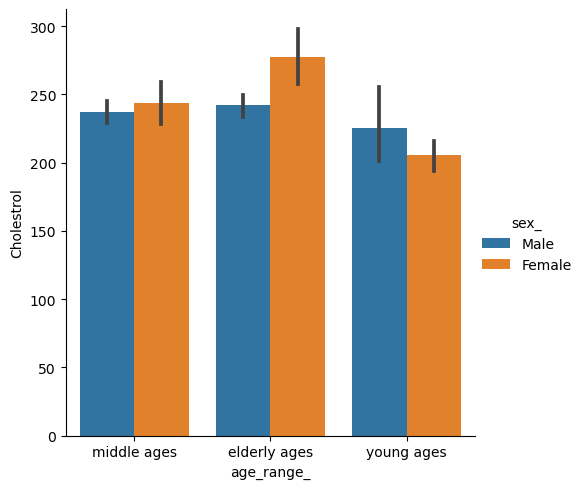

In [31]:
plt.figure(figsize=(10,5))
sns.catplot(x="age_range_", y="Cholestrol",
                 hue="sex_",
                 data=heart_disease, kind="bar")
plt.show()

/Users/ds_learner51/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


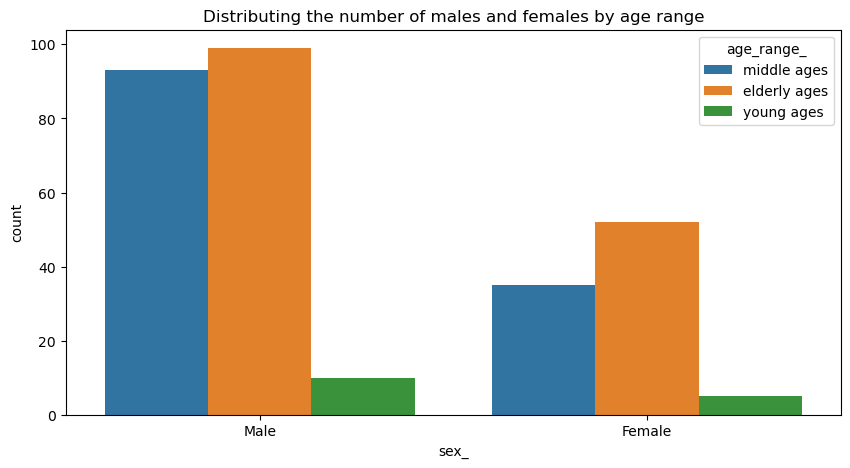

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(heart_disease.sex_,hue=heart_disease.age_range_)
plt.title('Distributing the number of males and females by age range')
plt.show()

In [33]:
# plt.figure(figsize=(10,5))
# sns.barplot(x=heart_disease.age_range_.value_counts()[:10].index,y=heart_disease.age_range_.value_counts()[:10].values)
# plt.xlabel('Age Range')
# plt.ylabel('Age Counter')
# plt.title('Age Range Analysis')
# plt.show()
heart_disease.head()

,thalach,oldpeak,slope,sex_,Heart Disease,Cholestrol,Chest pains,Resting blood pressure,Resting electrocardiographic results,heart rate,Exercise induced angina,major blood vessels,age_range_,fasting_blood_sugar,thalassimia
0,168,1.0,2,Male,No Heart disease,212,0,125,1,168,0,2,middle ages,False,Hydrops
1,155,3.1,0,Male,No Heart disease,203,0,140,0,155,1,0,middle ages,True,Hydrops
2,125,2.6,0,Male,No Heart disease,174,0,145,1,125,1,0,elderly ages,False,Hydrops
3,161,0.0,2,Male,No Heart disease,203,0,148,1,161,0,1,elderly ages,False,Hydrops
4,106,1.9,1,Female,No Heart disease,294,0,138,1,106,0,3,elderly ages,True,Haemoglobin disease


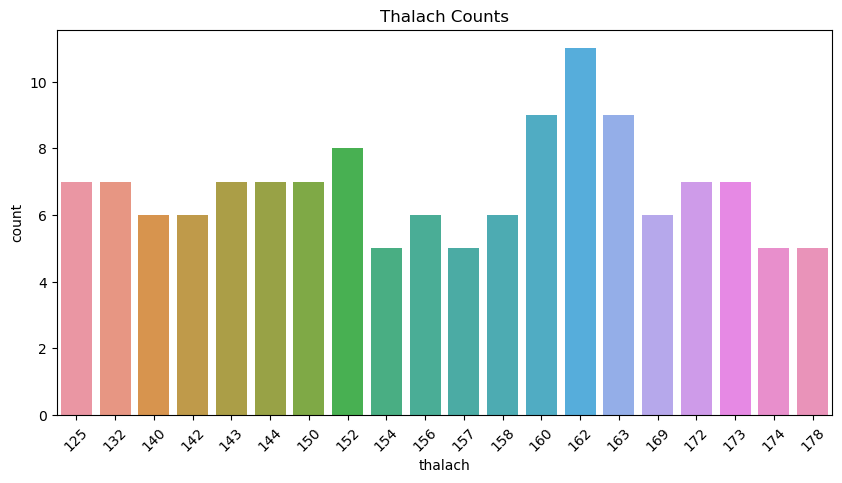

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=heart_disease.thalach.value_counts()[:20].index,y=heart_disease.thalach.value_counts()[:20].values)
plt.xlabel('thalach')
plt.ylabel('count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In [35]:
age_range_thalach=heart_disease.groupby('age_range_')['thalach'].mean()

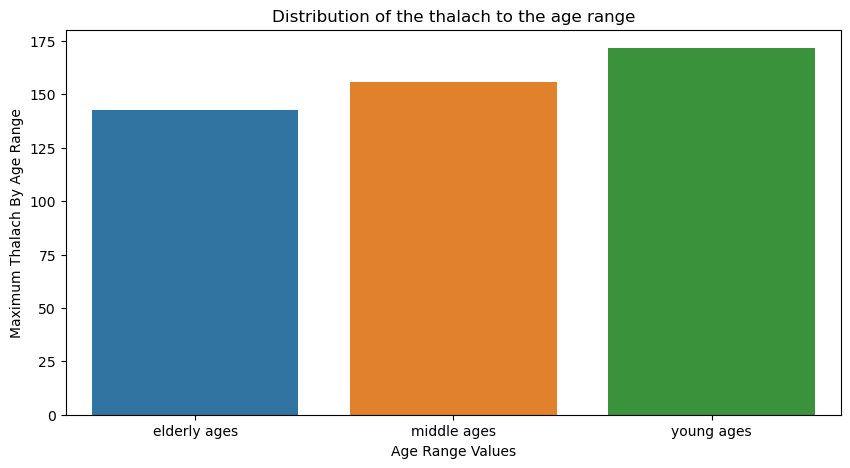

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('Distribution of the thalach to the age range')
plt.show()

# Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class). Here, we observe that the number for class true, is lower compared to class false.

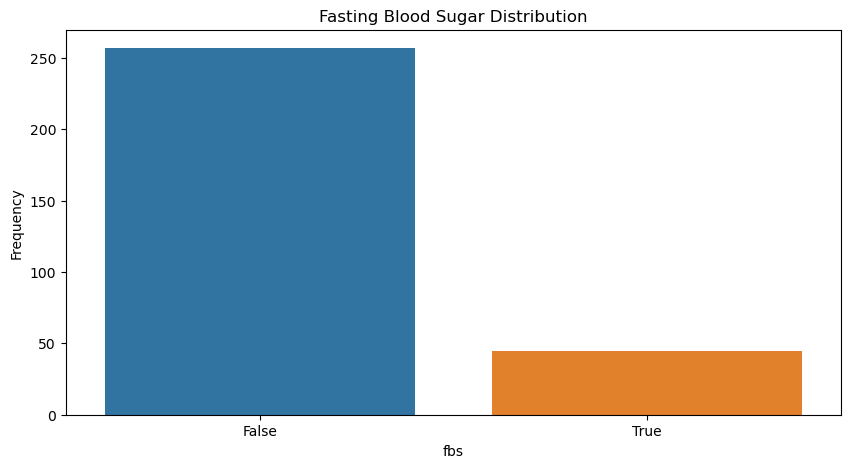

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='fasting_blood_sugar', data=heart_disease)
plt.xlabel('fbs')
plt.ylabel('Frequency')
plt.title('Fasting Blood Sugar Distribution')
plt.show()

/Users/ds_learner51/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


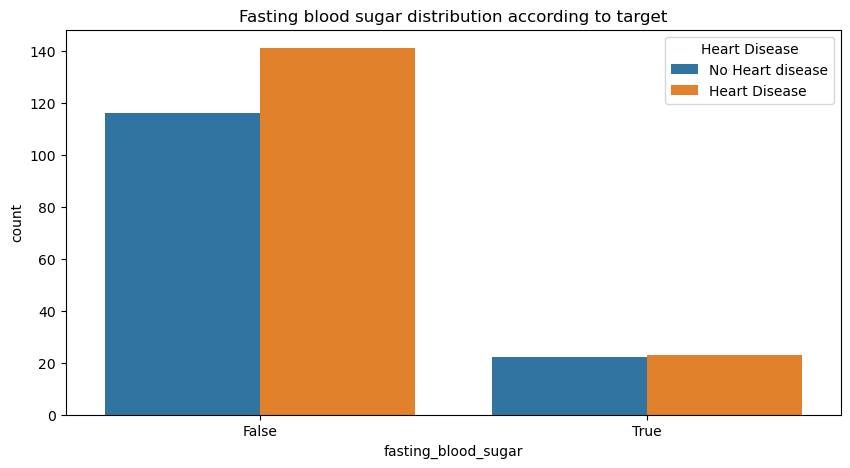

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(heart_disease.fasting_blood_sugar,hue=heart_disease['Heart Disease'])
plt.title('Fasting blood sugar distribution according to target')
plt.show()

([<matplotlib.patches.Wedge at 0x7f8de966bb20>,
 [Text(1.099924911073122, 0.01285262622132264, '0'),
  Text(1.0993586677969378, 0.037556884052627894, '0'),
  Text(1.098418872274141, 0.0589574510304186, '0'),
  Text(1.0970289043116404, 0.08079345954222981, '0'),
  Text(1.0953395127452683, 0.10115014492801358, '0'),
  Text(1.093597877634345, 0.11850604218206093, '0'),
  Text(1.0912569960684095, 0.1384130359892138, '0'),
  Text(1.0882991964315607, 0.16001518379959828, '0'),
  Text(1.0848632601663557, 0.18185628045582053, '0'),
  Text(1.0813975425893911, 0.20144318028075808, '0'),
  Text(1.0778692727611743, 0.2195400438127351, '0'),
  Text(1.0737066713308865, 0.23906899409908372, '0'),
  Text(1.0679740008372003, 0.2634986404818515, '1'),
  Text(1.0619652886296274, 0.2867572592730523, '0'),
  Text(1.0562226795771972, 0.3072354978624144, '0'),
  Text(1.0496285129407423, 0.32905924211577137, '2'),
  Text(1.0437244317207086, 0.34733170115796225, '0'),
  Text(1.0369928661036563, 0.3669411337668

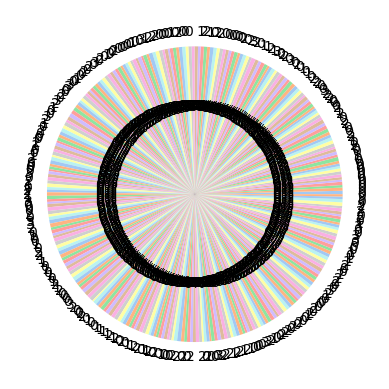